## Деревья решений

### Критерий информативности

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
Counter([9,9,9,7,7])

Counter({9: 3, 7: 2})

### Для классификации

Расчёт энтропийного критерия:

$H(R) = -\sum_{k=1}^{K}p_klogp_k$

In [ ]:
def entropy(data):
    length = len(data)
    cnt = Counter(data)

    ent = 0
    for cl in cnt.values():
        p = cl / length
        l2 = np.log2(p)
        it = -p * l2
        ent += it

    return ent

#### 🧠 Упражнение. Реализация критерия Джини

По аналогии с *энтропийным критерием* заполните функцию *критерия Джини*

$Н(R) = \sum_{k=1}^{K}p_k(1-p_k)$

In [ ]:
def gini(data):
    length = len(data)
    cnt = Counter(data)

    gini = 0
    for cl in cnt.values():
        p_1 = ...
        p_2 = ...
        it = ...
        gini += ...

    return gini

##### 🧠 Упражнение (ответ). Реализация критерия Джини

In [ ]:
def gini(data):
    length = len(data)
    cnt = Counter(data)

    gini = 0
    for cl in cnt.values():
        p_1 = cl / length
        p_2 = (1 - p_1)
        it = p_1 * p_2
        gini += it

    return gini

### Прирост информации

*Information Gain (IG)* - функционал качества, отвечающий на вопрос, а сколько энтропии мы погасили при определённом разбиении? На каждом шаге разбиения при построении дерева максимизируется IG. Формула для вычисления при критерии информативности H:

$IG(R) = H(R) - \frac{|R_l|}{|R|}H(R_l) - \frac{|R_r|}{|R|}H(R_r)$

In [ ]:
def information_gain(crit, data, i):
    left_data = data[:i]
    right_data = data[i:]
    left_crit = (len(left_data) / len(data)) * crit(left_data)
    right_crit = (len(right_data) / len(data)) * crit(right_data)
    return crit(data) - left_crit - right_crit

Тут функция для визуализации работы произвольного критерия качества на выборке

In [ ]:
def get_best_split(crit, data):
    print("{:4} {:4} {:4} {:4}".format("#","IG","Hl","Hr"))
    print("_" * 20)
    i_max, ig_max = 0, 0

    for i in range(1, len(data)):
        ig = information_gain(crit, data, i)
        crit_left = crit(data[:i])
        crit_right = crit(data[i:])

        print(f"{i:2}. {ig:.2f} {crit_left:.2f} {crit_right:.2f}")

        if ig_max < ig:
            i_max, ig_max = i, ig

    print(f'Деление после элемента:{i_max}')

Определим как-нибудь выборку и посмотрим, какое разбиение предложат критерии информативности. Замечу, что элементы здесь будут выводиться начиная со второго, а значения функций рассчитаны для разбиения *перед* элементом строки

In [ ]:
data = ['cat'] * 5 + ['dog'] * 3
# data = ['cat'] + ['dog'] + ['cat'] * 2 + ['dog'] * 2 + ['cat'] * 2
data

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog']

In [ ]:
get_best_split(entropy, data)

#    IG   Hl   Hr  
____________________
 1. 0.09 0.00 0.99
 2. 0.20 0.00 1.00
 3. 0.35 0.00 0.97
 4. 0.55 0.00 0.81
 5. 0.95 0.00 0.00
 6. 0.47 0.65 0.00
 7. 0.20 0.86 0.00
Деление после элемента:5


In [ ]:
get_best_split(gini, data)

#    IG   Hl   Hr  
____________________
 1. 0.04 0.00 0.49
 2. 0.09 0.00 0.50
 3. 0.17 0.00 0.48
 4. 0.28 0.00 0.38
 5. 0.47 0.00 0.00
 6. 0.26 0.28 0.00
 7. 0.11 0.41 0.00
Деление после элемента:5


### Для регрессии

In [ ]:
import pandas as pd


x1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
x2 = np.array([-10, 10, -2, 6, 2, 3, -15, 30, 30])
X = pd.DataFrame({'x1': x1, 'x2': x2})

y = np.array([0, 1, 2, 0.1, 1.1, 2.1, 0.2, 1.2, 2.2])

#### 🧠 Упражнение 2. Реализация критерия squared_error

По аналогии с критериями информативности для классификации реализуйте функцию для подсчет средне-квадратичной ошибки

$Н(R) = \frac{1}{n}\sum_{k=1}^{n} (y - \bar{y})^ 2$

In [ ]:
def squared_error(y):
    y_mean = ...
    err = ...
    return err

In [ ]:
squared_error(y)

0.6733333333333333

##### 🧠 Упражнение (ответ). Реализация критерия squared_error

In [ ]:
def squared_error(y):
    y_mean = y.mean()
    err = np.sum((y - y_mean) ** 2) / y.shape[0]
    return err

#### 🧠 Упражнение 3. Реализация поиска лучшего разбиения

1. Перебираем все признаки:
   * сортируем выбранный признак по возрастанию
   * перебираем пороги разделения выборки на две части, считая информационный критерий
2. Выбираем лучшее разбиение с точки зрения значения прироста информации


In [ ]:
ig_max = 0
best_feature = 0
best_val = 0

for feature in ...:
    for val in ...:
        left_inds = ...
        right_inds = ...
        if len(left_inds) == 0 or len(right_inds) == 0:
            continue

        left_data, right_data = ...
        left_y, right_y = ...

        left_crit = ...
        right_crit = ...


        ig = squared_error(y) - left_crit - right_crit

        if ig_max <= ig:
            ig_max = ig
            best_feature = feature
            best_val = val

In [ ]:
ig_max, best_feature, best_val

(0.28571428571428564, 'x2', -10)

##### 🧠 Упражнение 3 (ответ). Реализация поиска лучшего разбиения

In [ ]:
ig_max = 0
best_feature = 0
best_val = 0

for feature in X.columns:
    for val in X[feature].unique():
        left_inds = X[X[feature] <= val].index
        right_inds = X[X[feature] > val].index
        if len(left_inds) == 0 or len(right_inds) == 0:
            continue

        left_data, right_data = X.loc[left_inds], X.loc[right_inds]
        left_y, right_y = y[left_inds], y[right_inds]

        left_crit = (len(left_inds) / X.shape[0]) * squared_error(left_y)
        right_crit = (len(right_inds) / X.shape[0]) * squared_error(right_y)


        ig = squared_error(y) - left_crit - right_crit

        if ig_max <= ig:
            ig_max = ig
            best_feature = feature
            best_val = val

In [ ]:
ig_max, best_feature, best_val

(0.28571428571428564, 'x2', -10)

Можем проверить себя с помощью реализации из sklearn

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=1).fit(X, y)
dt.score(X, y)

0.4243281471004243

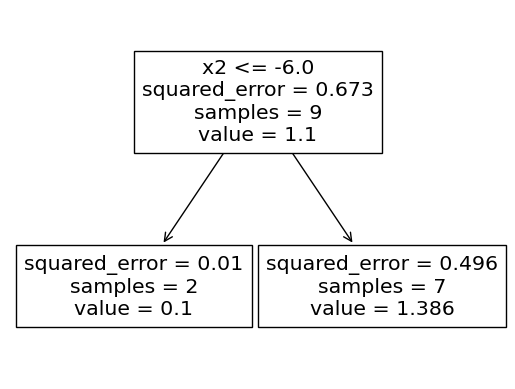

In [ ]:
plot_tree(dt, feature_names=X.columns);

In [ ]:
tmp_df = X.copy()
tmp_df['y'] = y

In [ ]:
left_data = tmp_df[tmp_df[best_feature] <= best_val]
right_data = tmp_df[tmp_df[best_feature] > best_val]
display(left_data, right_data)

,x1,x2,y
0,0,-10,0.0
6,6,-15,0.2


,x1,x2,y
1,1,10,1.0
2,2,-2,2.0
3,3,6,0.1
4,4,2,1.1
5,5,3,2.1
7,7,30,1.2
8,8,30,2.2


In [ ]:
sorted(tmp_df['x2'].unique())

(-10 + -2) / 2

-6.0

## Критерии останова

Поработаем с данными о продажах и оценках видеоигр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [ ]:
!wget https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL -O videogames.csv

--2024-08-22 12:58:51--  https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.google.com (drive.google.com)... 74.125.134.138, 74.125.134.102, 74.125.134.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL [following]
--2024-08-22 12:58:51--  https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1618040 (1.5M) [application/octet-stream]
Saving to: ‘videogames.csv’

videogames.csv      100%[===================>]   1.54M  --.-KB/s    in 0.009s  

2024-08-22 12:58:53 (167 MB/s

In [ ]:
import pandas as pd

df = pd.read_csv('videogames.csv')
print(df.shape)

(16719, 16)


### Перевод в классификацию

In [ ]:
# пропуски
df = df.dropna(subset='User_Score')
# строки
df = df[~(df['User_Score'] == 'tbd')]
df['User_Score'] = df['User_Score'].astype('float')

df['User_Score_cls'] = pd.cut(df['User_Score'], bins=[0, 6, 8, 10], labels=['low', 'med', 'high'])

df = df.drop(columns=['Name', 'Publisher', 'Developer'])

df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,User_Score_cls
0,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E,med
2,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E,high
3,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E,med
6,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,E,high
7,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E,med


### Предобработка

In [ ]:
from sklearn.model_selection import train_test_split


df = df.dropna()

target = 'User_Score_cls'

X = df.drop(columns=[target, 'User_Score'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


cat_cols = X_train.select_dtypes('object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

ohe = OneHotEncoder(sparse=False).fit(X_train[cat_cols])
X_train_pipe = X_train.copy()
X_test_pipe = X_test.copy()

X_train_pipe[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_cols])
X_test_pipe[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_cols])

X_train_pipe.drop(columns=cat_cols, inplace=True)
X_test_pipe.drop(columns=cat_cols, inplace=True)



# ss = StandardScaler()


X_train_pipe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(5460, 45)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_pipe, y_train)


dt.score(X_train_pipe, y_train), dt.score(X_test_pipe, y_test)

(1.0, 0.5351390922401171)

### 🧠 Упражнение: подбор параметров модели Decision Tree через кросс-валидацию

Переберите параметры:

1. max_depth от 1 до 10
2. min_samples_leaf от 1 до 50

Считайте метрику ROC AUC с OvO по кросс-валидации на 5 фолдах.

Выберите самую лучшую модель.

#### 🧠 Упражнение: подбор параметров модели Decision Tree через кросс-валидацию (ответ)


In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


params = {'max_depth': np.arange(1, 10),
          'min_samples_leaf': np.arange(1, 50, 5)}

dt = DecisionTreeClassifier(random_state=1)

gs = GridSearchCV(
    dt, params,
    cv=5, scoring='roc_auc_ovo'
)

gs.fit(X_train_pipe, y_train)

gs.best_params_

{'max_depth': 9, 'min_samples_leaf': 46}

In [ ]:
stata = pd.DataFrame(gs.cv_results_)
stata.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
89,0.045580,0.001510,0.014535,0.000904,9,46,"{'max_depth': 9, 'min_samples_leaf': 46}",0.782372,0.758024,0.790254,0.777281,0.773559,0.776298,0.010715,1
79,0.028913,0.000358,0.009999,0.000834,8,46,"{'max_depth': 8, 'min_samples_leaf': 46}",0.784518,0.757939,0.791111,0.774473,0.769156,0.775439,0.011616,2
88,0.093479,0.013570,0.026353,0.009780,9,41,"{'max_depth': 9, 'min_samples_leaf': 41}",0.785280,0.753949,0.790564,0.775100,0.771003,0.775179,0.012704,3
78,0.032041,0.003549,0.010135,0.000350,8,41,"{'max_depth': 8, 'min_samples_leaf': 41}",0.787671,0.753367,0.791381,0.773073,0.770315,0.775161,0.013582,4
87,0.046614,0.001060,0.014083,0.000610,9,36,"{'max_depth': 9, 'min_samples_leaf': 36}",0.782448,0.754841,0.789930,0.776946,0.770435,0.774920,0.011911,5


### Оценка влияния признаков

In [ ]:
best_model = gs.best_estimator_
best_model.score(X_train_pipe, y_train), best_model.score(X_test_pipe, y_test)

(0.6545787545787546, 0.6281112737920937)

In [ ]:
best_model.feature_importances_

array([0.20710425, 0.00615506, 0.0180029 , 0.01913444, 0.00674098,
       0.01274294, 0.53733114, 0.03218803, 0.09306217, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02427267, 0.01024817, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01436311, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00713162, 0.        , 0.        , 0.00494727,
       0.        , 0.        , 0.        , 0.        , 0.00657523])

In [ ]:
imps = pd.Series(best_model.feature_importances_, index=X_train_pipe.columns)
imps.sort_values(ascending=False)

,0
Critic_Score,0.537331
Year_of_Release,0.207104
User_Count,0.093062
Critic_Count,0.032188
Platform_PS2,0.024273
JP_Sales,0.019134
EU_Sales,0.018003
Platform_X360,0.014363
Global_Sales,0.012743
Platform_PS3,0.010248


In [ ]:
cols2drop = imps[imps == 0].index

X_train_pipe.drop(columns=cols2drop, inplace=True)
X_test_pipe.drop(columns=cols2drop, inplace=True)

X_train_pipe.shape

(5460, 15)

In [ ]:
best_model = DecisionTreeClassifier(random_state=1, **gs.best_params_).fit(X_train_pipe, y_train)
best_model.score(X_train_pipe, y_train), best_model.score(X_test_pipe, y_test)

(0.6545787545787546, 0.6281112737920937)

## Дерево решений для регрессии

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)

X = np.sort(10 * np.random.rand(50, 1), axis=0)
y = np.sin(X[:, 0])

y[::5] += 3 * (0.5 - np.random.rand(10))

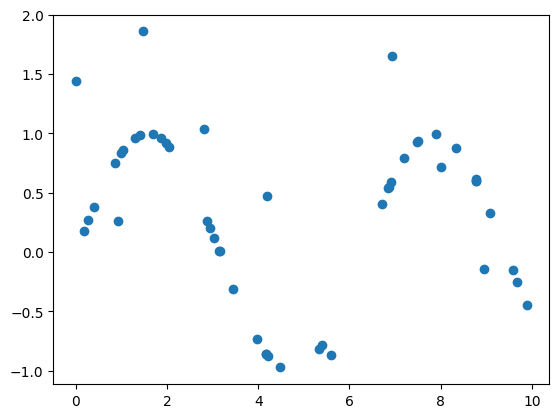

In [ ]:
plt.scatter(X, y);

In [ ]:
list_depth = [1, 2, 3, 4, 5, 7]

dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X, y)

dt_regs['depth=inf'] = DecisionTreeRegressor(random_state=10).fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, random_state=10).fit(X, y)

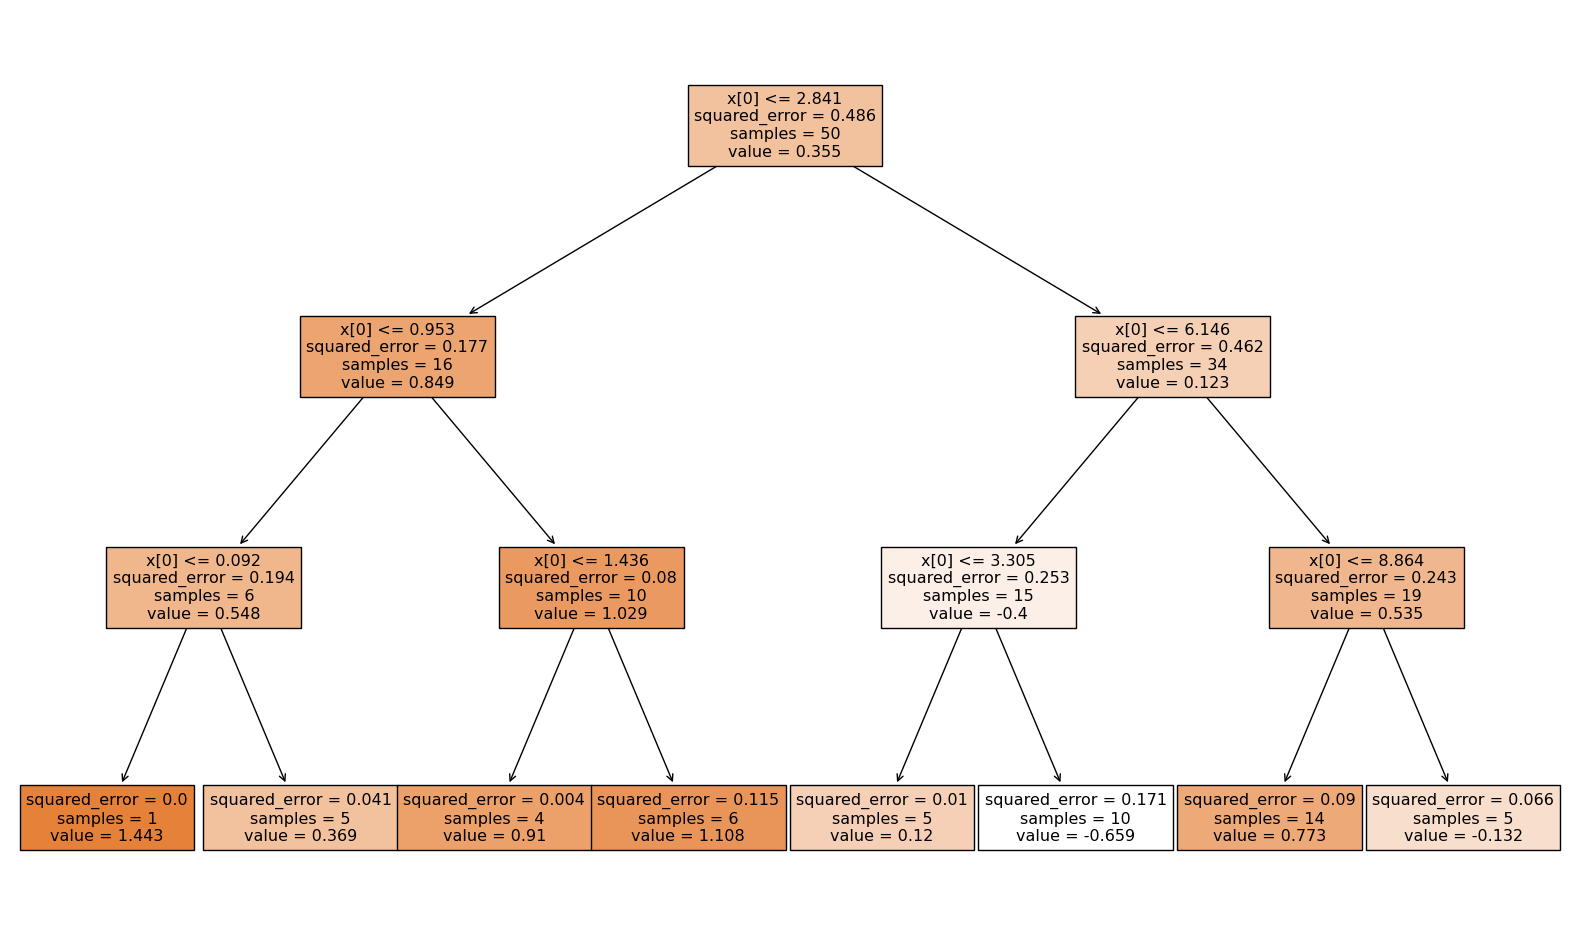

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(dt_regs['depth=3'], filled=True);

In [ ]:
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]

pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)
      print(key, cur_dt_reg.score(X, y), cur_dt_reg.score(X_test, np.sin(X_test)))

depth=1 0.2360747359785319 0.17890381336190453
depth=2 0.5731990797028333 0.6495781350767871
depth=3 0.824564021557204 0.749888719560271
depth=4 0.8961986179198297 0.8126117446353597
depth=5 0.9796090310634048 0.7744256471415543
depth=7 0.9985544686602744 0.7876500439845783
depth=inf 1.0 0.7876699830775417
reg 0.8394381085376528 0.8265964845774035


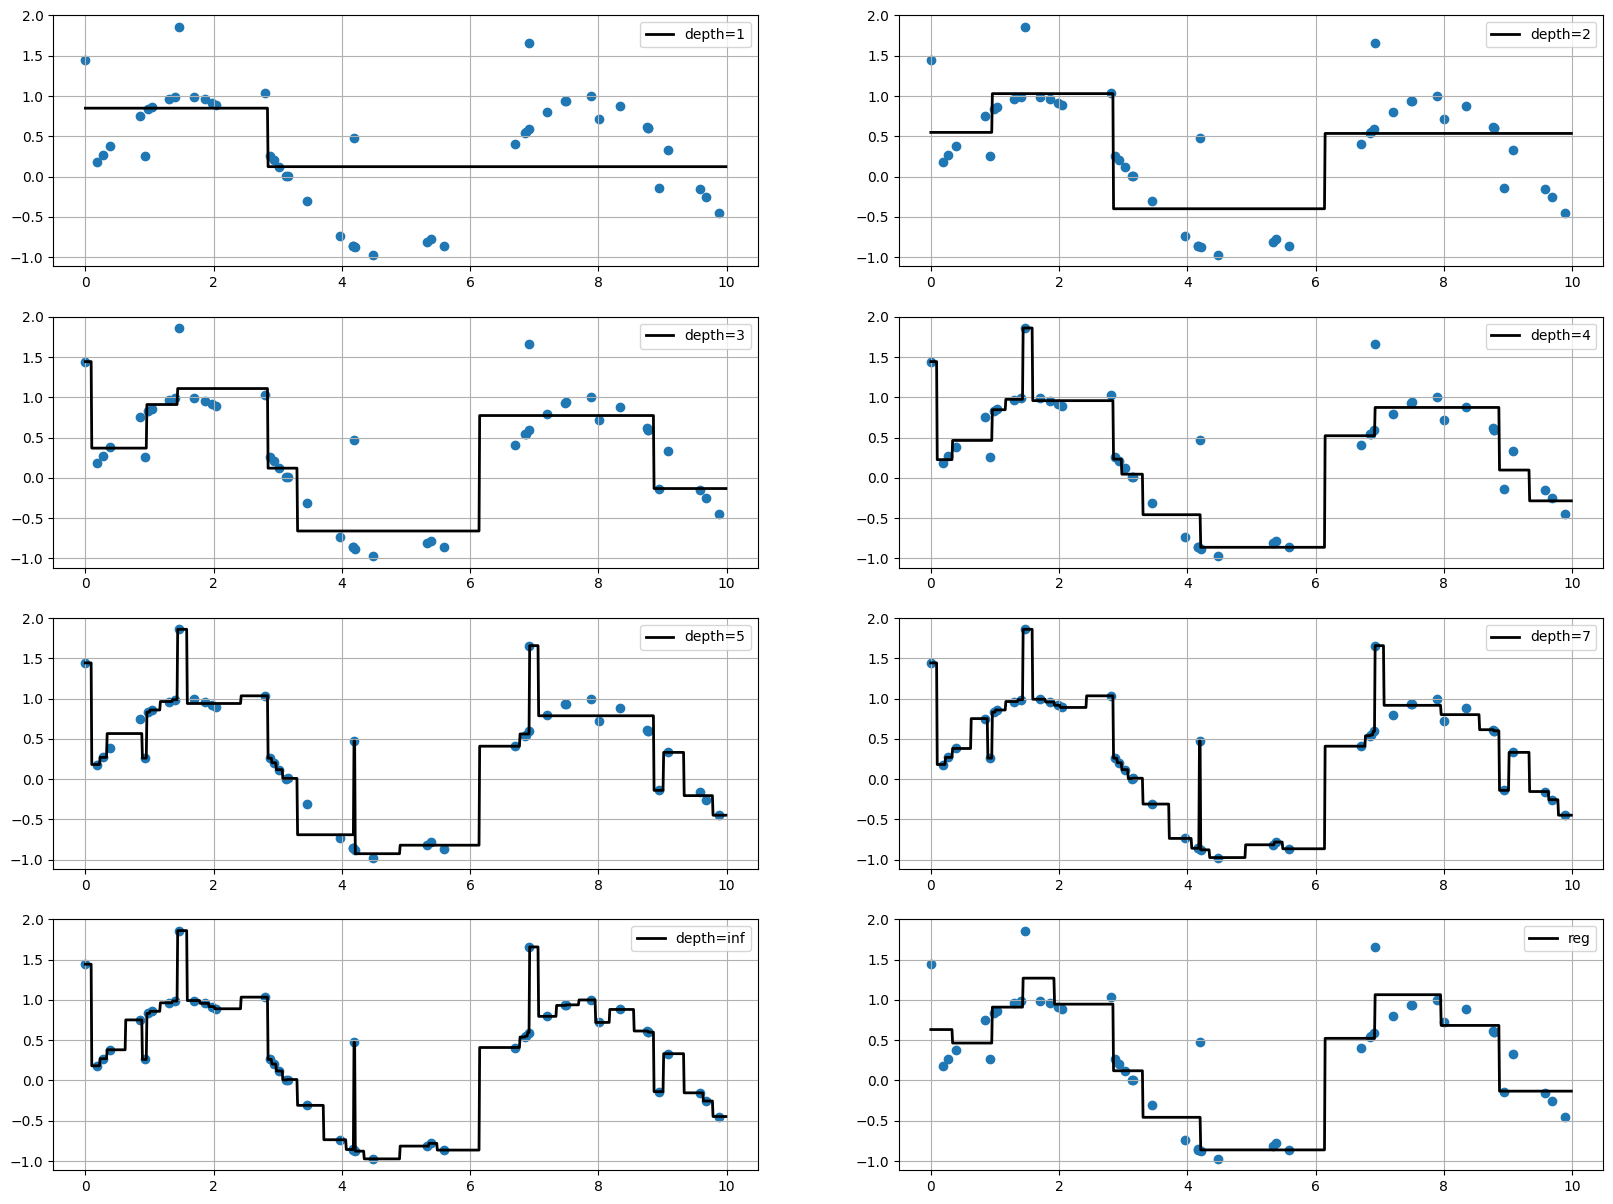

In [ ]:
fig, axa = plt.subplots(4,2, figsize=(20,15))

for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2, i%2]
    ax.scatter(X, y)
    ax.plot(X_test, cur_pred, label=f"{key}", c='k', linewidth=2)
    ax.grid()
    ax.legend()

plt.show()

## **Дополнительные материалы**
1. Дерево решений для задачи регресии https://youtu.be/0mMeaC3gjNI
2. Дерево решений для задачи классификации https://youtu.be/j8L07nuns2Y
3. Критерии останова дерева решений https://youtu.be/aWEdaXAZ01M
4. Классификация, деревья решений https://habr.com/ru/company/ods/blog/322534/
5. Энтропия и деревья принятия решений https://habr.com/ru/post/171759/